### ImageXD Hackaton : `dask.array` out-of-core processing

In [1]:
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
import multiprocessing

multiprocessing.set_start_method('forkserver')

In [3]:
import dask.array as da

In [4]:
# imagefile = 'skidask/Image001_Registered_16bit_cutout_movie.gif'

# import skimage.io as io

# image = io.imread(imagefile)

# image.shape

In [5]:
import h5py

In [6]:
from skimage.util import apply_parallel

from skimage import filters

In [7]:
datafile = '/Users/michael/FHNW/Conferences/2016_ImageXD/skidask/data/2photon.hdf5'

In [8]:
#imagedata = h5py.File('data/2photon.hdf5')['data']

#type(imagedata)

In [9]:
#chunks = (50, 128, 128)
#array = da.from_array(imagedata, chunks)

In [10]:
import profile_stuff

In [11]:
import importlib

In [12]:
importlib.reload(profile_stuff)

<module 'profile_stuff' from '/Users/michael/FHNW/Conferences/2016_ImageXD/skidask/profile_stuff.py'>

In [13]:
_ = profile_stuff.run_apply_parallel(datafile, (100, 256, 256), mode='h5py-direct')

Running gaussing filter on h5py array using dask.
Filename: /Users/michael/FHNW/Conferences/2016_ImageXD/skidask/profile_stuff.py

Line #    Mem usage    Increment   Line Contents
    16    109.7 MiB      0.0 MiB   @profile
    17                             def run_apply_parallel(imagepath, chunks, mode='h5py-direct'):
    18                             
    19    109.7 MiB      0.0 MiB       sigma = 3
    20                                 
    21                             
    22    109.7 MiB      0.0 MiB       if mode == 'h5py-direct':
    23    109.7 MiB      0.0 MiB           print('Running gaussing filter on h5py array using dask.')
    24    110.4 MiB      0.7 MiB           with h5py.File(imagepath, 'r') as f:
    25    110.6 MiB      0.2 MiB               image = f['data']
    26    326.4 MiB    215.8 MiB               result = apply_parallel(filters.gaussian, image, chunks, extra_arguments=(sigma, ), depth=sigma)
    27                             
    28                   

In [13]:
results = profile_stuff.run_apply_parallel(datafile, (100, 256, 256), mode='numpy-array')

Running gaussing filter on numpy array using dask.
Filename: /Users/michael/FHNW/Conferences/2016_ImageXD/skidask/profile_stuff.py

Line #    Mem usage    Increment   Line Contents
    16    109.9 MiB      0.0 MiB   @profile
    17                             def run_apply_parallel(imagepath, chunks, mode='h5py-direct'):
    18                             
    19    109.9 MiB      0.0 MiB       sigma = 3
    20                                 
    21                             
    22    109.9 MiB      0.0 MiB       if mode == 'h5py-direct':
    23                                     print('Running gaussing filter on h5py array using dask.')
    24                                     with h5py.File(imagepath, 'r') as f:
    25                                         image = f['data']
    26                                         result = apply_parallel(filters.gaussian, image, chunks, extra_arguments=(sigma, ), depth=sigma)
    27                             
    28    109.9 MiB     

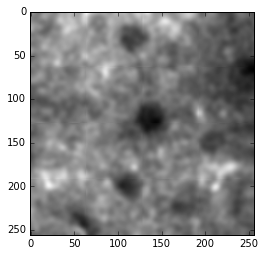

In [15]:
plt.imshow(results[0], cmap='gray')

In [14]:
_ = profile_stuff.run_apply_parallel(datafile, (10, 64, 64), mode='numpy-array')

Running gaussing filter on numpy array using dask.
Filename: /Users/michael/FHNW/Conferences/2016_ImageXD/skidask/profile_stuff.py

Line #    Mem usage    Increment   Line Contents
    16    110.5 MiB      0.0 MiB   @profile
    17                             def run_apply_parallel(imagepath, chunks, mode='h5py-direct'):
    18                             
    19    110.5 MiB      0.0 MiB       sigma = 3
    20                                 
    21    110.5 MiB      0.0 MiB       image = h5py.File(imagepath, 'r')['data']
    22                             
    23    110.5 MiB      0.0 MiB       if mode == 'h5py-direct':
    24                                     print('Running gaussing filter on h5py array using dask.')
    25                                     result = apply_parallel(filters.gaussian, image, chunks, extra_arguments=(sigma, ), depth=sigma)
    26                             
    27    110.5 MiB      0.0 MiB       elif mode == 'numpy-array':
    28    110.5 MiB      

In [15]:
_ = profile_stuff.run_apply_parallel(datafile, (10, 64, 64), mode='h5py-direct')

Running gaussing filter on h5py array using dask.
Filename: /Users/michael/FHNW/Conferences/2016_ImageXD/skidask/profile_stuff.py

Line #    Mem usage    Increment   Line Contents
    16    201.0 MiB      0.0 MiB   @profile
    17                             def run_apply_parallel(imagepath, chunks, mode='h5py-direct'):
    18                             
    19    201.0 MiB      0.0 MiB       sigma = 3
    20                                 
    21    201.0 MiB      0.0 MiB       image = h5py.File(imagepath, 'r')['data']
    22                             
    23    201.0 MiB      0.0 MiB       if mode == 'h5py-direct':
    24    201.0 MiB      0.0 MiB           print('Running gaussing filter on h5py array using dask.')
    25    241.6 MiB     40.6 MiB           result = apply_parallel(filters.gaussian, image, chunks, extra_arguments=(sigma, ), depth=sigma)
    26                             
    27                                 elif mode == 'numpy-array':
    28                    

In [16]:
imagedata = h5py.File('data/2photon.hdf5')['data']
darray = da.from_array(imagedata, chunks=(10, 64, 64))
darray.sum().compute()

436847575

In [19]:
size(darray)

NameError: name 'size' is not defined

In [20]:
import sys

In [25]:
sys.getsizeof(imagedata[:])

26214528

In [26]:
sys.getsizeof(imagedata)

56

In [22]:
sys.getsizeof(darray)

88

In [24]:
sys.getsizeof(da.from_array(imagedata[:], (100, 128, 128)))

88

In [ ]:
darray2 = da.from_array(darray, chunks=(50, 128, 128))

darray2.sum().compute()

In [35]:
cd skidask

/Users/michael/FHNW/Conferences/2016_ImageXD/skidask


In [33]:
type(imagedata) == h5py._hl.dataset.Dataset

True

In [32]:
type(imagedata)

h5py._hl.dataset.Dataset

In [30]:
@profile
def run_apply_parallel(image, chunks, version='h5py'):
    
    sigma = 3
    
    if version == 'h5py':
        apply_parallel(filters.gaussian, image, chunks, extra_arguments=(sigma, ), depth=sigma)

In [31]:
run_apply_parallel(imagedata, (10, 64, 64))

ERROR: Could not find file <ipython-input-30-34c2690369ed>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.


In [10]:
%time result = apply_parallel(filters.gaussian, imagedata, chunks, extra_arguments=(3, ))

CPU times: user 697 ms, sys: 238 ms, total: 935 ms
Wall time: 419 ms


In [11]:
%time result = apply_parallel(filters.gaussian, imagedata[:], chunks, extra_arguments=(3, ))

CPU times: user 839 ms, sys: 133 ms, total: 972 ms
Wall time: 378 ms


In [26]:
%time result = apply_parallel(filters.gaussian, imagedata, (10, 64, 64), extra_arguments=(3, ), depth=6)

CPU times: user 3.45 s, sys: 503 ms, total: 3.96 s
Wall time: 2.53 s


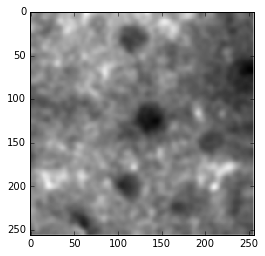

In [27]:
plt.imshow(result[0], cmap='gray', interpolation='none')

In [11]:
image0 = imagedata[0]

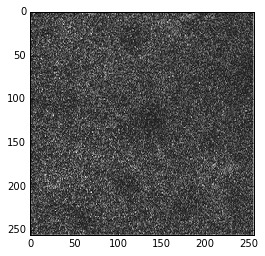

In [12]:
plt.imshow(image0, cmap='gray', interpolation='none')

In [16]:
result = apply_parallel(filters.gaussian, image0, (128, 128), extra_arguments=(3, ))

In [15]:
result

array([[  3.47029439e-08,   3.51632700e-08,   3.57598027e-08, ...,
          2.77012797e-08,   2.74548456e-08,   2.74518738e-08],
       [  3.41921388e-08,   3.46787720e-08,   3.52435848e-08, ...,
          2.74859996e-08,   2.69976627e-08,   2.67312572e-08],
       [  3.36568831e-08,   3.41427289e-08,   3.46577611e-08, ...,
          2.73739573e-08,   2.66465682e-08,   2.61109281e-08],
       ..., 
       [  3.09232425e-08,   3.12895604e-08,   3.16051770e-08, ...,
          3.20910915e-08,   3.32496551e-08,   3.44152304e-08],
       [  3.14044066e-08,   3.16753708e-08,   3.17988382e-08, ...,
          3.18073500e-08,   3.31559381e-08,   3.45315989e-08],
       [  3.18768896e-08,   3.20624479e-08,   3.19979504e-08, ...,
          3.13782249e-08,   3.28486927e-08,   3.43715180e-08]])

In [17]:
def add_x(array, x):
    return array+x

In [20]:
apply_parallel(add_x, image0, (126, 126), extra_arguments=(5))

TypeError: add_x() argument after * must be a sequence, not int

Traceback
---------
  File "/Users/michael/miniconda3/envs/ImageXD/lib/python3.4/site-packages/dask/async.py", line 267, in execute_task
    result = _execute_task(task, data)
  File "/Users/michael/miniconda3/envs/ImageXD/lib/python3.4/site-packages/dask/async.py", line 248, in _execute_task
    args2 = [_execute_task(a, cache) for a in args]
  File "/Users/michael/miniconda3/envs/ImageXD/lib/python3.4/site-packages/dask/async.py", line 248, in <listcomp>
    args2 = [_execute_task(a, cache) for a in args]
  File "/Users/michael/miniconda3/envs/ImageXD/lib/python3.4/site-packages/dask/async.py", line 249, in _execute_task
    return func(*args2)
  File "/Users/michael/miniconda3/envs/ImageXD/lib/python3.4/site-packages/skimage/util/apply_parallel.py", line 103, in wrapped_func
    return function(arr, *extra_arguments, **extra_keywords)


In [15]:
def run_map_overlap(func, imagepath, chunks, overlap, mode='h5py-direct', extra_arguments=(), extra_keywords={}):

    boundary='periodic'

    def wrapped_func(arr):
        return function(arr, *extra_arguments, **extra_keywords)

    if mode == 'h5py-direct':
        print('Running gaussing filter on h5py array using dask.')
        with h5py.File(imagepath, 'r') as f:
            darr = da.from_array(f['data'], chunks=chunks)
            result = darr.map_overlap(wrapped_func, overlap, boundary=boundary).compute()

    elif mode == 'numpy-array':
        print('Running gaussing filter on numpy array using dask.')
        with h5py.File(imagepath, 'r') as f:
            darr = da.from_array(f['data'][:], chunks=chunks)
            result = darr.map_overlap(wrapped_func, overlap, boundary=boundary).compute()

    return result